## Importing Data

In [42]:
#% matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Import Data
url = 'https://raw.githubusercontent.com/pgardocki3/ME8813ML/master/HW4/HW4Dataset.csv'
df = pd.read_csv(url)
df.drop('Unnamed: 0', inplace=True, axis=1) 
df.head()

X_train, X_test= train_test_split(df, test_size=0.33, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(df.shape)
print(X_test.shape)

(8900, 15)
(2937, 15)


## Scree-Plot

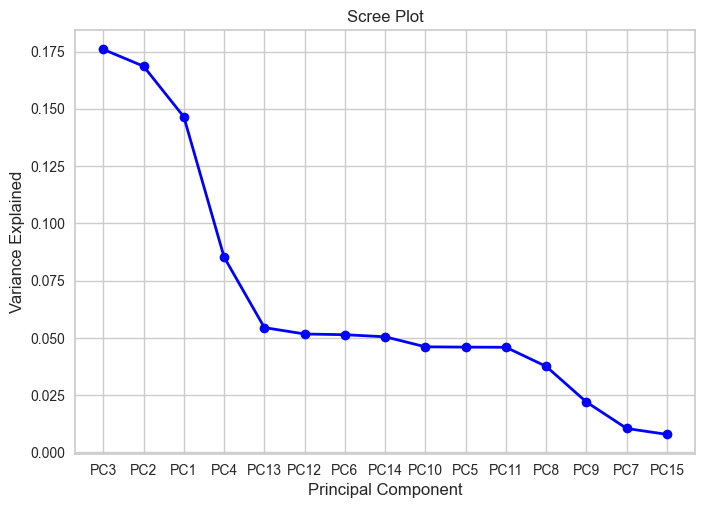

In [46]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

for i in range(1, len(df.iloc[0,:])):
    df.iloc[:,i-1] = df.iloc[:,i-1]/np.max(df.iloc[:,i-1])

PC_values = df.var()[0:15]
PC_values = df.var()[0:15]/PC_values.sum()
PC_values = PC_values.sort_values(ascending=False)
plt.plot( PC_values, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


## K-Means Clustering

/Users/patrickgardocki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/patrickgardocki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/patrickgardocki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/patrickgardocki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

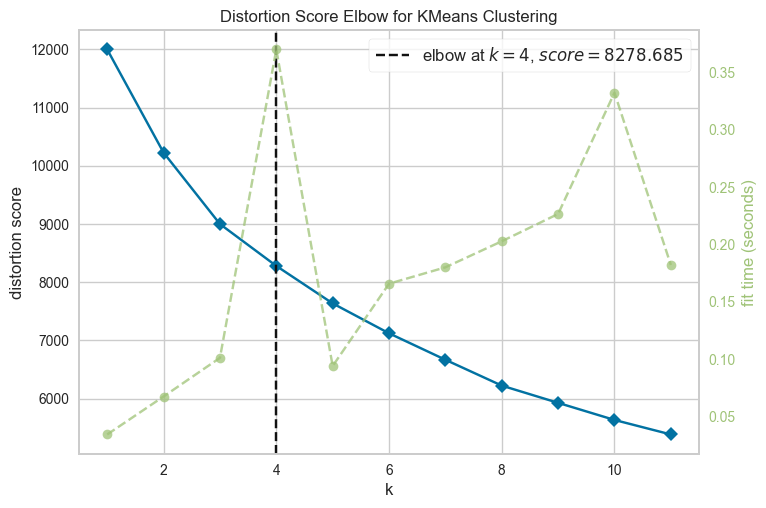

Silhouetter Score: 0.168
8998.26759631661


In [47]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

# sse = []
# minClust = 1
# maxClust = 15
# for i in range(minClust, maxClust):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#     kmeans.fit(df)
#     sse.append(kmeans.inertia_)


# plt.plot(range(minClust, maxClust), sse)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('sse')
# plt.xticks(np.arange(minClust, maxClust, 1))
# plt.grid()
# plt.show()

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


km = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(df)
score = sk.metrics.silhouette_score(df, km.labels_)
print('Silhouetter Score: %.3f' % score)


print(km.inertia_) 


## Gaussian Mixture Modeling

Silhouetter Score: 0.141


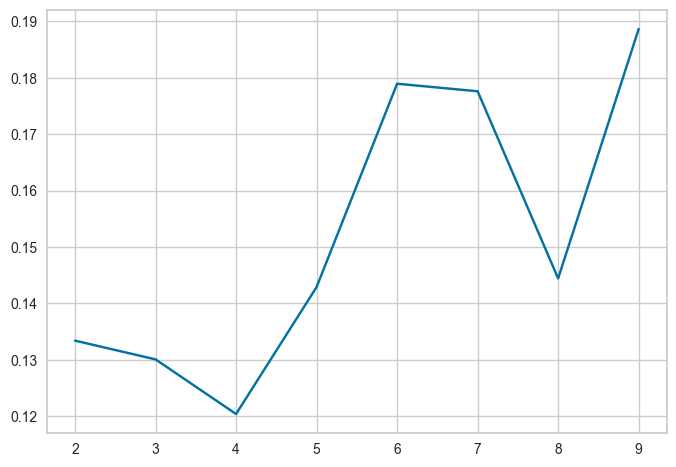

In [48]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
gmm = GaussianMixture(n_components=3, max_iter=100, n_init=100, random_state=0)
gmm.fit(df)

#predictions from gmm
labels = gmm.predict(df)
frame = pd.DataFrame(df)
silhouettes = []
for k in range(2, 10):
    km = GaussianMixture(k).fit(df)
    
    y = km.predict(df)
    silhouettes.append(silhouette_score(df, y))
    
fig, ax = plt.subplots()
ax.plot(range(2, 10), silhouettes);

score = sk.metrics.silhouette_score(df, labels)
print('Silhouetter Score: %.3f' % score)

## AutoEncoder

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense_18 (Dense)            (None, 10)                160       
                                                                 
 dense_19 (Dense)            (None, 5)                 55        
                                                                 
 dense_20 (Dense)            (None, 4)                 24        
                                                                 
 dense_21 (Dense)            (None, 5)                 25        
                                                                 
 dense_22 (Dense)            (None, 10)                60        
                                                                 
 dense_23 (Dense)            (None, 15)                165 

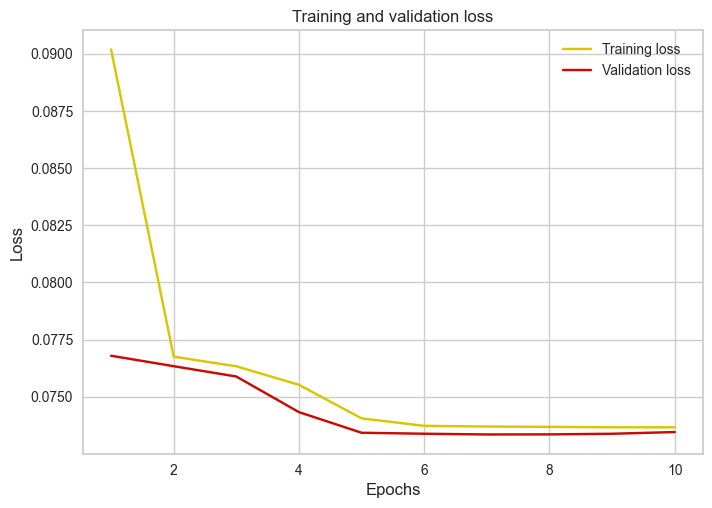

92/92 [==============================] - 0s 921us/step


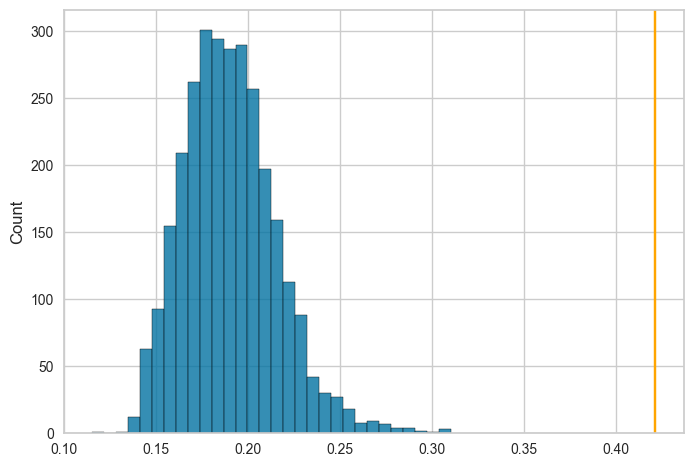

In [49]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
encoding_dim = 5 
input_img = Input(shape=(15,0))


# Encoder
input_dim = Input(shape = (15, ))
encoded1 = Dense(10, activation = 'relu')(input_dim)
encoded2 = Dense(5, activation = 'relu')(encoded1)
encoded3 = Dense(4, activation = 'relu')(encoded2)
# Decoder
decoded1 = Dense(5, activation = 'relu')(encoded3)
decoded2 = Dense(10, activation = 'relu')(decoded1)
decoded3 = Dense(15, activation = 'relu')(decoded2)

autoencoder = Model(inputs = input_dim, outputs = decoded3)
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
autoencoder.summary()


history = autoencoder.fit(X_train, X_train,epochs=10,batch_size=6,shuffle=True,validation_data=(X_test, X_test))


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()


prediction = autoencoder.predict(X_test)
loss = tf.keras.losses.mae(prediction, X_test)

sns.histplot(loss, bins=30, alpha=0.8)
plt.axvline(x=loss_threshold, color='orange')
